<a href="https://colab.research.google.com/github/aka-hombre/MAT421/blob/main/HWCH17_Bii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HW Module B: Section 17.4, 17.5**#

##LaGrange Polynomial interpolation##

Rather than trying to piece together multiple cubics to interpolate our points, LaGrangian interpolation trys to find a single polynomial to do this work. This polynomial is called the LaGrangian polynomial, denoted as $L(x)$, and is definied such that $L(x_i)=y_i$ for every data point in the set. For computing LaGrange polynomials it is useful to write them as linear combinations of LaGrange basis polynomials, such that:

$P_i(x) = \prod\limits_{j=1,j\neq i}^{n}\frac{x-x_j}{x_i-x_j}$ where

$L(x)=\sum\limits_{i=1}^{n} y_iP_i(x)$

Let's try it first analytically with the following points $(1,3),(2,12),(3,27)$

$P_1(x) = \frac{(x-2)(x-3)}{(1-2)(1-3)} = \frac{1}{2}(x^2-5x+6)$

$P_2(x) = \frac{(x-1)(x-3)}{(2-1)(2-3)} = -(x^2-4x+3)$

$P_3(x) = \frac{(x-1)(x-2)}{(3-1)(3-2)} = \frac{1}{2}(x^2-3x+2)$

$L(x) = 3P_1(x) + 12P_2(x) + 27P_3(x) = 3x^2$

Now let's use Python!

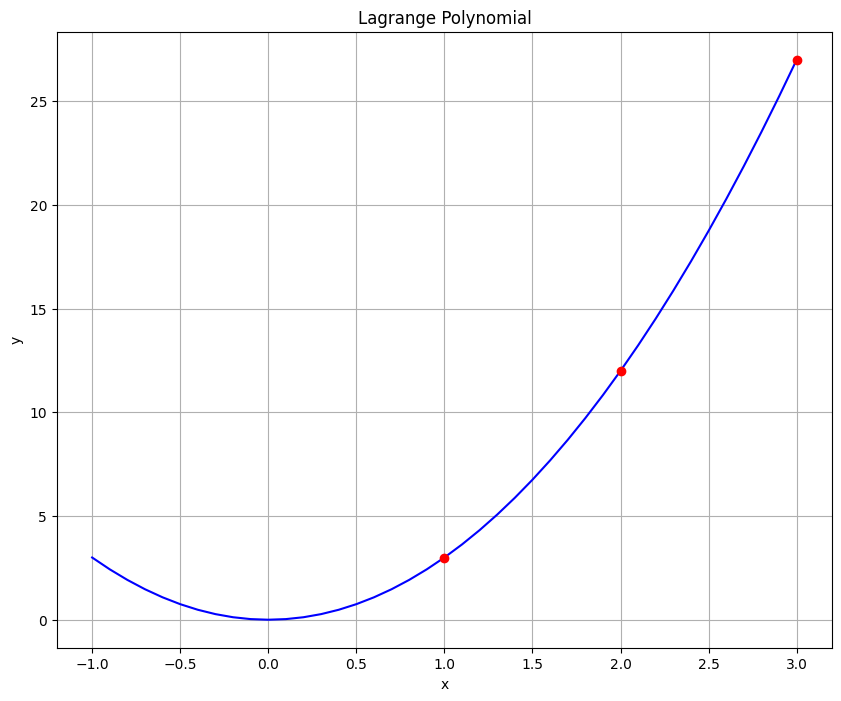

In [1]:
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3]
y = [3,12,27]

f = lagrange(x, y)

x_new = np.arange(-1.0, 3.1, 0.1)


ig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##Newton's Polynomial interpolation##

Newton's Interpolation is another way of constructing an interpolation function. For $n$ points the method will yeild a $n-1$ degree polynomial. Such that:

\begin{equation}
f(x) = \sum_{i=0}^{n}a_in_i(x)
\text{     where}\\
n_i(x) = \prod_{j=0}^{i-1}(x-x_j)
\end{equation}

The method of finding the proper coefficient values, $a_i$ is calculated  using **divided diffrences**. We will use this method on the following points: $(0,0),(1,10),(2,16),(3,0)$

Text(0, 0.5, 'y')

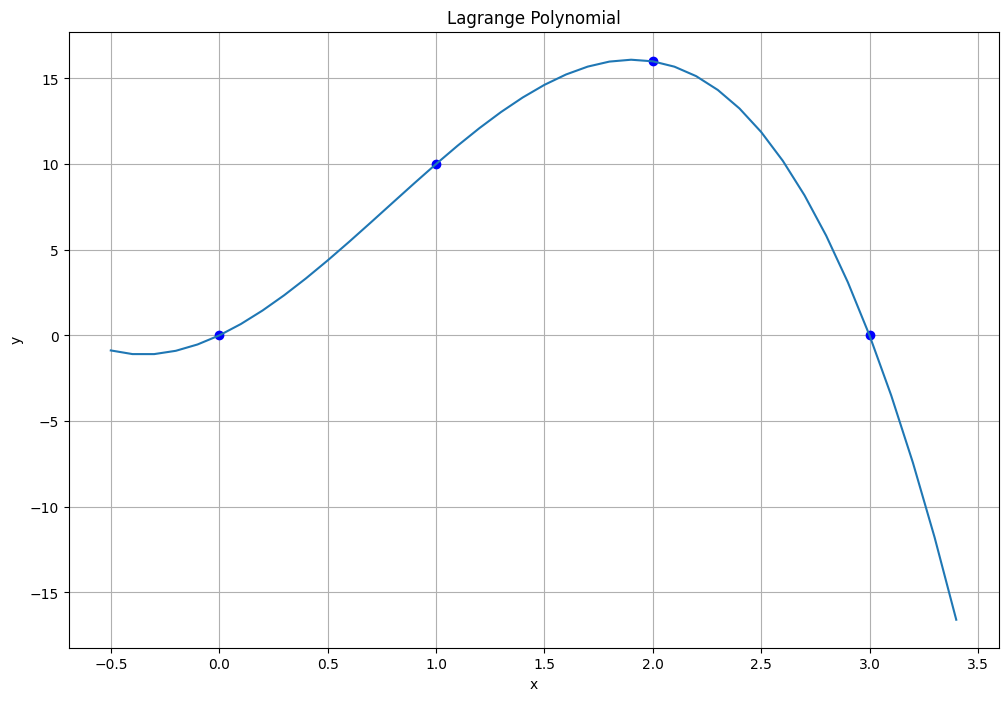

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x, y):

    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
      for i in range(n-j):
        coef[i][j] = \
         (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):

    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p


x = np.array([0, 1, 2, 3])
y = np.array([0, 10, 16, 0])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-0.5, 3.5, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.title('Newton Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')